# Keras model for recognizing handwritten digits

## Setup

In [2]:
# Imports
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras.utils import to_categorical
from keras.datasets import mnist

import pandas as pd

from sklearn.utils import shuffle

%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np
# Set the seed for consistent results
np.random.seed(1337)

c:\users\claus\documents\programmering\python\ai\venv\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Data

In [3]:
# Collect data
(x_train_entire, y_train_entire), (x_test, y_test) = mnist.load_data()

# ...for good measure
shuffle(x_train_entire, y_train_entire)

# Split in train/validation
x_train    = x_train_entire[ :45000]
x_validate = x_train_entire[45000: ]
y_train    = y_train_entire[ :45000]
y_validate = y_train_entire[45000: ]

print('Train    = ', len(x_train))
print('Validate = ', len(x_validate))
print('Test     = ', len(x_test))

# Reshape to a valid tensor
x_train_conv = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_validate_conv = x_validate.reshape(x_validate.shape[0], 28, 28, 1)
x_test_conv = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Casts the arrays to valid number type
x_train_conv = x_train_conv.astype('float32')
x_validate_conv = x_validate_conv.astype('float32')
x_test_conv = x_test_conv.astype('float32')

#One-hot encode the labels
y_train_one_hot = to_categorical(y_train, 10)
y_test_one_hot = to_categorical(y_test, 10)
y_validate_one_hot = to_categorical(y_validate, 10)

Train    =  45000
Validate =  15000
Test     =  10000


In [4]:
# Adapt the data

# Normalize the features from [0-255] to [0-1] 
x_train_conv /= 255
x_validate_conv /= 255
x_test_conv /= 255

## Model

In [5]:
# Build model
model_name = '3conv_128-256_2max'
model = Sequential()

model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [6]:
# Compile model
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

model.summary()
trained = False # To prevent overwriting a trained network by mistake later

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 128)       1280      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 256)       295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 512)       1180160   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 512)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12800)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               3277056   
__________

## Training

In [9]:
# Train model
batch_size = 128

history = model.fit(
                    x_train_conv, y_train_one_hot,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_validate_conv, y_validate_one_hot))

model.save_weights('persistence/' + model_name + '_weights.h5')
model.save('persistence/' + model_name + '_keras.h5')
trained = True # To prevent overwriting a trained network by mistake later

Train on 45000 samples, validate on 15000 samples
Epoch 1/10


ResourceExhaustedError: OOM when allocating tensor with shape[45000,128,26,26] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: conv2d_1/convolution = Conv2D[T=DT_FLOAT, data_format="NCHW", dilations=[1, 1, 1, 1], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](conv2d_1/convolution-0-TransposeNHWCToNCHW-LayoutOptimizer, conv2d_1/kernel/read)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

	 [[Node: metrics/acc/Mean/_153 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_836_metrics/acc/Mean", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


Caused by op 'conv2d_1/convolution', defined at:
  File "C:\Users\Claus\AppData\Local\Programs\Python\Python36\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Claus\AppData\Local\Programs\Python\Python36\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "c:\users\claus\documents\programmering\python\ai\venv\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "c:\users\claus\documents\programmering\python\ai\venv\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "c:\users\claus\documents\programmering\python\ai\venv\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "c:\users\claus\documents\programmering\python\ai\venv\lib\site-packages\tornado\platform\asyncio.py", line 127, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\Claus\AppData\Local\Programs\Python\Python36\lib\asyncio\base_events.py", line 422, in run_forever
    self._run_once()
  File "C:\Users\Claus\AppData\Local\Programs\Python\Python36\lib\asyncio\base_events.py", line 1432, in _run_once
    handle._run()
  File "C:\Users\Claus\AppData\Local\Programs\Python\Python36\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "c:\users\claus\documents\programmering\python\ai\venv\lib\site-packages\tornado\ioloop.py", line 759, in _run_callback
    ret = callback()
  File "c:\users\claus\documents\programmering\python\ai\venv\lib\site-packages\tornado\stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "c:\users\claus\documents\programmering\python\ai\venv\lib\site-packages\zmq\eventloop\zmqstream.py", line 536, in <lambda>
    self.io_loop.add_callback(lambda : self._handle_events(self.socket, 0))
  File "c:\users\claus\documents\programmering\python\ai\venv\lib\site-packages\zmq\eventloop\zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "c:\users\claus\documents\programmering\python\ai\venv\lib\site-packages\zmq\eventloop\zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "c:\users\claus\documents\programmering\python\ai\venv\lib\site-packages\zmq\eventloop\zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "c:\users\claus\documents\programmering\python\ai\venv\lib\site-packages\tornado\stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "c:\users\claus\documents\programmering\python\ai\venv\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "c:\users\claus\documents\programmering\python\ai\venv\lib\site-packages\ipykernel\kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "c:\users\claus\documents\programmering\python\ai\venv\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "c:\users\claus\documents\programmering\python\ai\venv\lib\site-packages\ipykernel\ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "c:\users\claus\documents\programmering\python\ai\venv\lib\site-packages\ipykernel\zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "c:\users\claus\documents\programmering\python\ai\venv\lib\site-packages\IPython\core\interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "c:\users\claus\documents\programmering\python\ai\venv\lib\site-packages\IPython\core\interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "c:\users\claus\documents\programmering\python\ai\venv\lib\site-packages\IPython\core\interactiveshell.py", line 2903, in run_ast_nodes
    if self.run_code(code, result):
  File "c:\users\claus\documents\programmering\python\ai\venv\lib\site-packages\IPython\core\interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-4-ea667fb8628b>", line 5, in <module>
    model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
  File "c:\users\claus\documents\programmering\python\ai\venv\lib\site-packages\keras\models.py", line 467, in add
    layer(x)
  File "c:\users\claus\documents\programmering\python\ai\venv\lib\site-packages\keras\engine\topology.py", line 619, in __call__
    output = self.call(inputs, **kwargs)
  File "c:\users\claus\documents\programmering\python\ai\venv\lib\site-packages\keras\layers\convolutional.py", line 168, in call
    dilation_rate=self.dilation_rate)
  File "c:\users\claus\documents\programmering\python\ai\venv\lib\site-packages\keras\backend\tensorflow_backend.py", line 3335, in conv2d
    data_format=tf_data_format)
  File "c:\users\claus\documents\programmering\python\ai\venv\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 782, in convolution
    return op(input, filter)
  File "c:\users\claus\documents\programmering\python\ai\venv\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 870, in __call__
    return self.conv_op(inp, filter)
  File "c:\users\claus\documents\programmering\python\ai\venv\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 522, in __call__
    return self.call(inp, filter)
  File "c:\users\claus\documents\programmering\python\ai\venv\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 206, in __call__
    name=self.name)
  File "c:\users\claus\documents\programmering\python\ai\venv\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 1039, in conv2d
    data_format=data_format, dilations=dilations, name=name)
  File "c:\users\claus\documents\programmering\python\ai\venv\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "c:\users\claus\documents\programmering\python\ai\venv\lib\site-packages\tensorflow\python\framework\ops.py", line 3290, in create_op
    op_def=op_def)
  File "c:\users\claus\documents\programmering\python\ai\venv\lib\site-packages\tensorflow\python\framework\ops.py", line 1654, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[45000,128,26,26] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: conv2d_1/convolution = Conv2D[T=DT_FLOAT, data_format="NCHW", dilations=[1, 1, 1, 1], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](conv2d_1/convolution-0-TransposeNHWCToNCHW-LayoutOptimizer, conv2d_1/kernel/read)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

	 [[Node: metrics/acc/Mean/_153 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_836_metrics/acc/Mean", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.



Availible variables to plot: dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


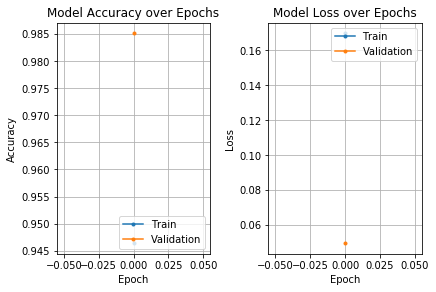

In [7]:
# Visualize training

def plot_training_history(history):
    """ Plot helper function """
    print('Availible variables to plot: {}'.format(history.history.keys()))
    line_style = '.-'
    
    # Accuracy
    plt.subplot(1,2,1)
    plt.plot(history.history['acc'], line_style)
    plt.plot(history.history['val_acc'], line_style)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.title('Model Accuracy over Epochs')
    plt.legend(['Train', 'Validation'], loc='lower right')
    plt.grid()

    # Loss
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], line_style)
    plt.plot(history.history['val_loss'], line_style)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.title('Model Loss over Epochs')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.grid()
    
    plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=1.0)
    plt.show()

if trained:
    plot_training_history(history)
else:
    print('Model not trained.')

In [7]:
# Load model from file (instead of training)
if not trained or (input('Overwrite the trained model? (y/n): ') == 'y'):
    # To prevent overwriting a traiened network by mistake
    weights_path = 'persistence/' + model_name + '_weights.h5'
    model.load_weights(weights_path)
    trained = False

## Testing

In [8]:
# Test model
score = model.evaluate(x_test_conv, y_test_one_hot, verbose=0)

print('Test Loss:', '%.4f' % score[0])
print('Test Accuracy: ', '%.2f' % (score[1] * 100), '%', sep='')

Test Loss: 0.0326
Test Accuracy: 99.25%


In [9]:
# Predict test set
predictions = model.predict(x_test_conv, verbose=0)

# Select index with max probability '[0.1, 0.01, 0, 0, 1, 0, 0.1]' -> '4'
predicted_nums = np.argmax(predictions, axis = 1)
# Select index to get ground truth labels '[0.1, 0.01, 0.2, 0, 1, 0, 0.1]' -> '4'
y_labels_nums = np.argmax(y_test_one_hot, axis= 1)

## Analysis

In [13]:
# Find the images it failed on
falsly_classified_indices = []

for i, (prediction, ground_truth) in enumerate(zip(predicted_nums, y_labels_nums)):
    if prediction != ground_truth:
        falsly_classified_indices.append(i)

failure_count = len(falsly_classified_indices)
print('Model falsly classified', failure_count, '/', len(y_test_one_hot), 'images.')

Model falsly classified 75 / 10000 images.


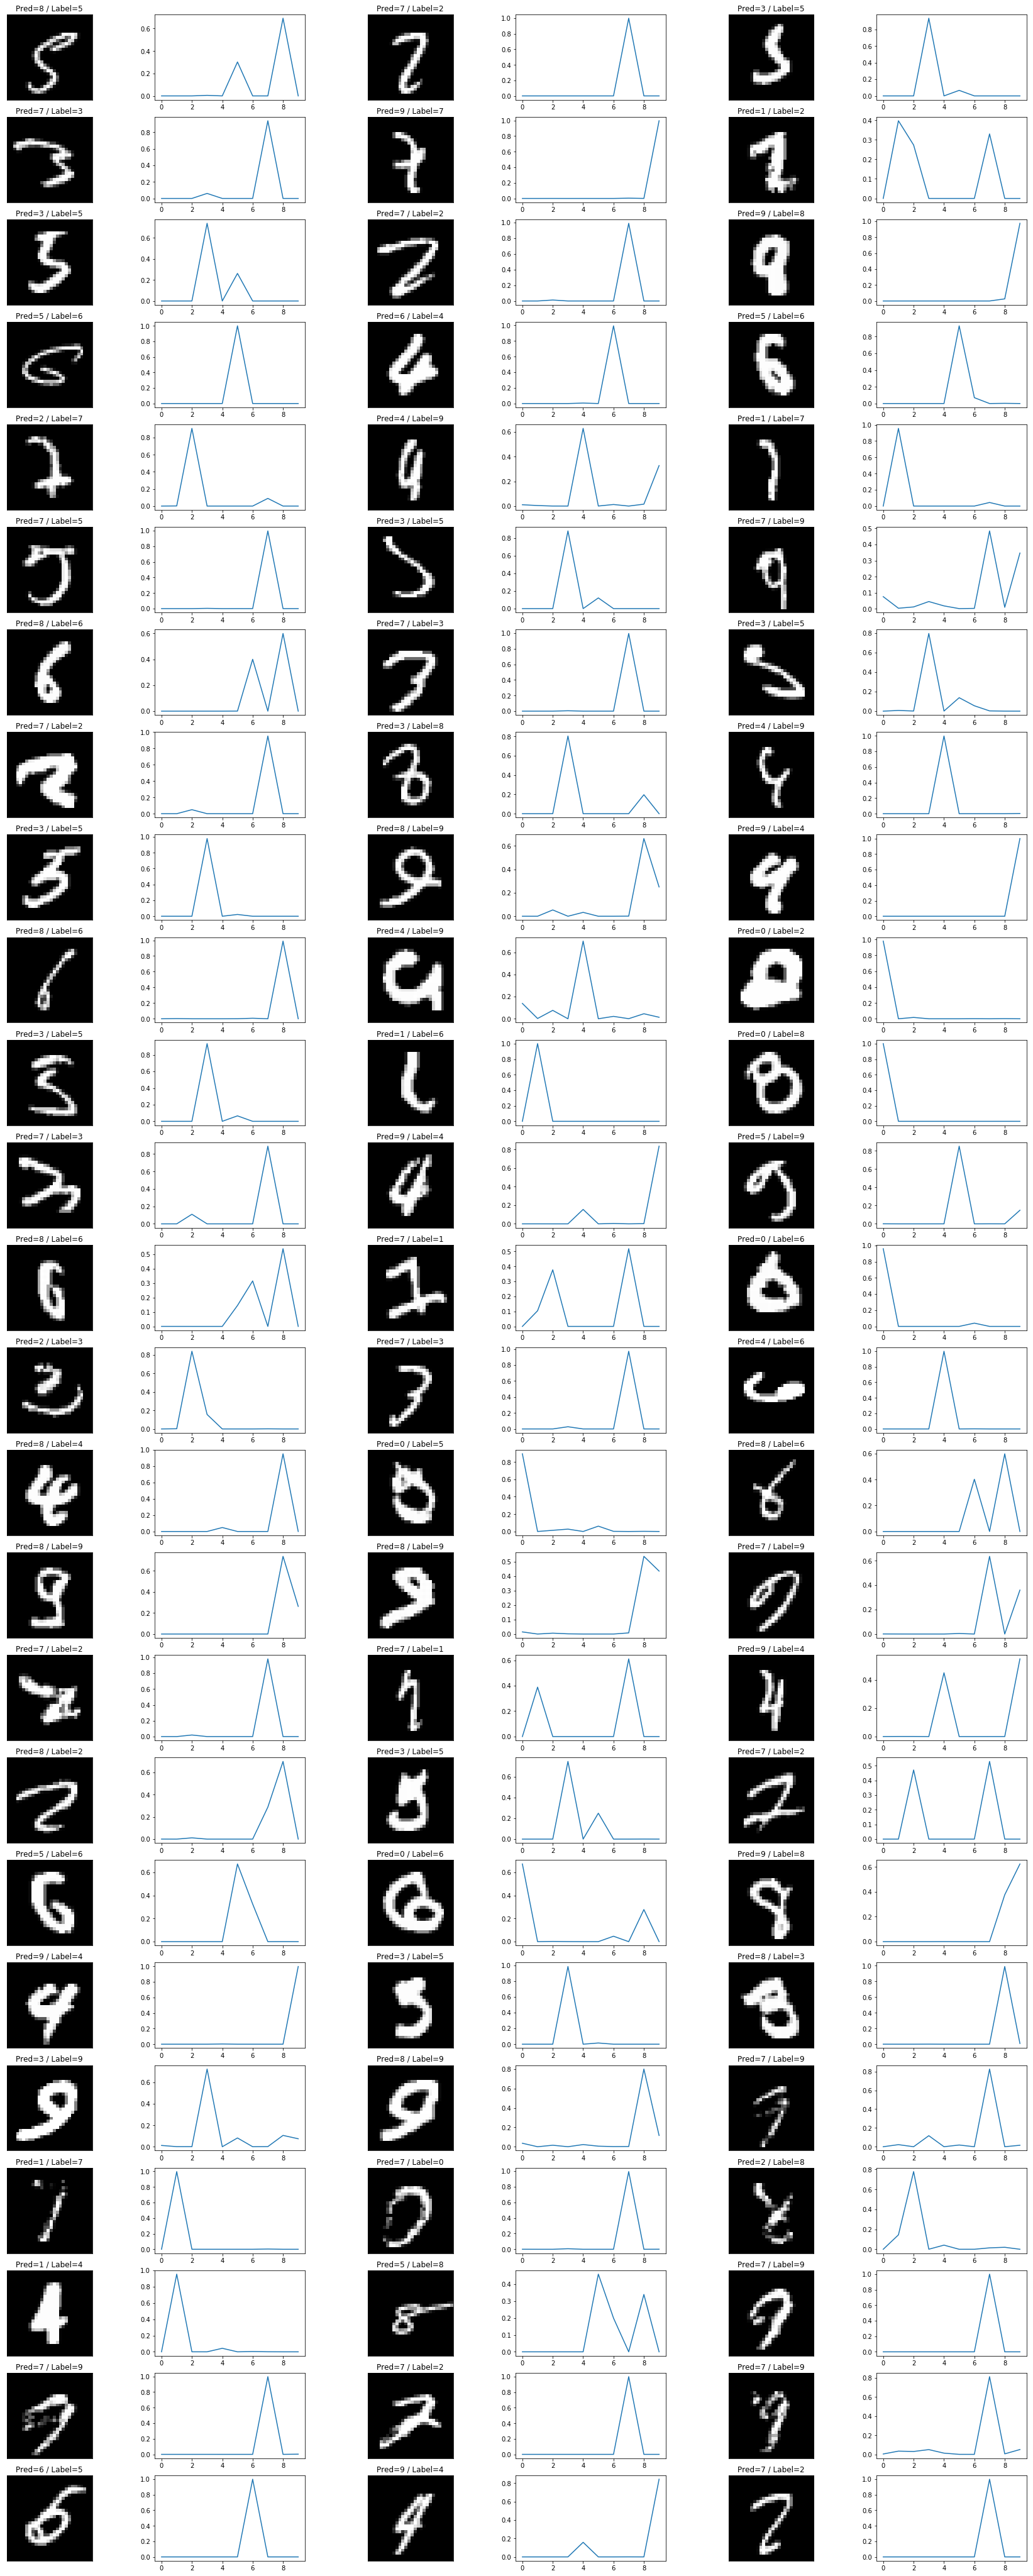

In [14]:
# Show images where the model failed
max_show_threshold = 100 # Do not show more than 100 pics for performance sake

def show_images_with_predict_graph():
    """ Plots images with their corresponding predict graph from the model """
    columns = min(failure_count, 3) * 2
    rows = 1 + failure_count // columns * 2
    fig = plt.figure(figsize=(30, 30))

    for i in range(failure_count):
        img = x_test[falsly_classified_indices[i]]
        pixels = np.array(img, dtype='uint8').reshape((28, 28))
        fig.add_subplot(rows, columns, i * 2 + 1)
        ax = plt.gca()
        ax.axes.xaxis.set_visible(False)
        ax.axes.yaxis.set_visible(False)
        plt.title('Pred=' + str(predicted_nums[falsly_classified_indices[i]]) + ' / Label=' + 
                  str(y_labels_nums[falsly_classified_indices[i]]))
        plt.imshow(pixels, cmap='gray')
        
        fig.add_subplot(rows, columns, i * 2 + 2)
        plt.plot(predictions[falsly_classified_indices[i]])
    
    plt.subplots_adjust(top=2)
    plt.show()

if failure_count == 0:
    print('Flawless classifiaction!')
elif failure_count < max_show_threshold:
    show_images_with_predict_graph()
else:
    print('Too many falsly classified images to show.')

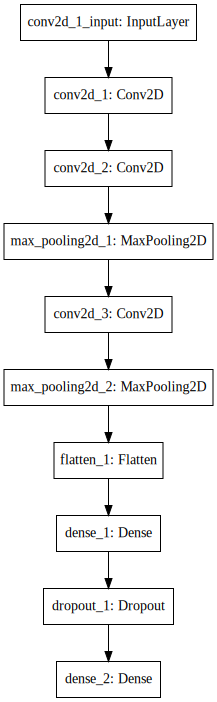

In [15]:
# Show model structure
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

## Submission

Make result submission csv for Kaggle (https://www.kaggle.com/c/digit-recognizer)
Make sure you have downloaded test.csv from the site.

In [11]:
# Get Kaggle dataset in right format
kaggle_test = pd.read_csv("local_data/test.csv")
kaggle_test /= 255
kaggle_test = kaggle_test.values.reshape(kaggle_test.shape[0], 28, 28, 1)
kaggle_test = kaggle_test.astype('float32')

In [12]:
# Predict Kaggle test set
predictions = model.predict(kaggle_test, verbose=0)

# Select index with max probability '[0.1, 0.01, 0, 0, 1, 0, 0.1]' -> '4'
predicted_nums = np.argmax(predictions, axis = 1)

In [15]:
# Make result submission csv
results = pd.Series(predicted_nums, name='Label')

submission = pd.concat((pd.Series(range(1,28001), name='ImageId'), results), axis = 1)
submission.to_csv('results/mnist_' + model_name + '_submission.csv', index=False)